In [1]:
from hashlib import sha1
import hmac
from wsgiref.handlers import format_date_time
from datetime import datetime
from time import mktime
import base64
from requests import request
from pprint import pprint
import  json
import demjson
import os
import time
from datetime import datetime
import socket

In [2]:
app_id = 'app_id'
app_key = 'app_key'

In [3]:
class Auth():


    def __init__(self, app_id, app_key):
        self.app_id = app_id
        self.app_key = app_key

    def get_auth_header(self):
        xdate = format_date_time(mktime(datetime.now().timetuple()))
        hashed = hmac.new(self.app_key.encode('utf8'), ('x-date: ' + xdate).encode('utf8'), sha1)
        signature = base64.b64encode(hashed.digest()).decode()

        authorization = 'hmac username="' + self.app_id + '", ' + \
                        'algorithm="hmac-sha1", ' + \
                        'headers="x-date", ' + \
                        'signature="' + signature + '"'
        return {
            'Authorization': authorization,
            'x-date': format_date_time(mktime(datetime.now().timetuple())),
            'Accept - Encoding': 'gzip'
        }

In [74]:
a = Auth(app_id, app_key)
response01 = request('get','https://ptx.transportdata.tw/MOTC/v2/Bike/Station/Taipei?$format=JSON',headers= a.get_auth_header())

In [75]:
decodejson01 =  demjson.decode(response01.content)

In [76]:
lat=[]
lon=[]

for item in decodejson01:
    lat.append(item['StationPosition']['PositionLat'])
    lon.append(item['StationPosition']['PositionLon'])
location=list(zip(lat,lon))

In [77]:
location.remove(location[374])

In [78]:
import gmaps
gmaps.configure(api_key='apikey')

fig = gmaps.figure()

# generate some (latitude, longitude) pairs
# locations = [(51.5, 0.1), (51.7, 0.2), (51.4, -0.2), (51.49, 0.1)]

# heatmap_layer = gmaps.heatmap_layer(location)
symbols = gmaps.symbol_layer(location, fill_color='red', stroke_color='red')
fig.add_layer(symbols)
fig

Figure(layout=FigureLayout(height='420px'))

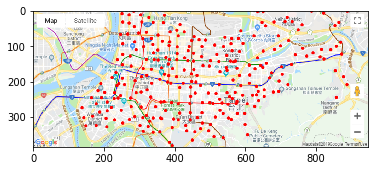

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('map.png')
plt.imshow(img)